In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# loading the data from sklearn
import sklearn.datasets
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [ ]:
data_frame.size

17639

In [ ]:
X.shape[0]

569

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

# Data Preprocessing (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, Y_train)

# Evaluate Logistic Regression
y_pred_lr = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_lr))
print(classification_report(Y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Predict for the first 5 rows of the test set
predictions_first_5 = log_reg.predict(X_test_scaled[:5])
print("Predictions for the first 5 rows:", predictions_first_5)
# Actual values for the first 5 rows
actual_first_5 = Y_test[:5].values
print("Actual values for the first 5 rows:", actual_first_5)

# Compare predictions with actual values
for i in range(5):
    print(f"Row {i+1}: Prediction = {predictions_first_5[i]}, Actual = {actual_first_5[i]}")

Predictions for the first 5 rows: [1 0 0 1 1]
Actual values for the first 5 rows: [1 0 0 1 1]
Row 1: Prediction = 1, Actual = 1
Row 2: Prediction = 0, Actual = 0
Row 3: Prediction = 0, Actual = 0
Row 4: Prediction = 1, Actual = 1
Row 5: Prediction = 1, Actual = 1


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes does not require scaling
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

# Evaluate Naive Bayes
y_pred_nb = naive_bayes.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state= 42)
decision_tree.fit(X_train, Y_train)

# Evaluate Decision Tree
y_pred_dt = decision_tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dt))
print(classification_report(Y_test, y_pred_dt))

Decision Tree Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

# ANN requires scaling
scaler_ann = StandardScaler()
X_train_ann = scaler_ann.fit_transform(X_train)
X_test_ann = scaler_ann.transform(X_test)

In [ ]:
# Build ANN Model
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the Neural Network
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Neural Network
history = model1.fit(X_train_ann, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4854 - loss: 0.6769 - val_accuracy: 0.6304 - val_loss: 0.6192
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8270 - loss: 0.4895 - val_accuracy: 0.7609 - val_loss: 0.4759
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9164 - loss: 0.3816 - val_accuracy: 0.8478 - val_loss: 0.3847
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9408 - loss: 0.3091 - val_accuracy: 0.8696 - val_loss: 0.3215
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9492 - loss: 0.2568 - val_accuracy: 0.8913 - val_loss: 0.2770
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9587 - loss: 0.2180 - val_accuracy: 0.8913 - val_loss: 0.2445
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9626 - loss: 0.1889 - val_accuracy: 0.8913 - val_loss: 0.2201
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.1669 - val_accuracy: 0.8913 - val_loss

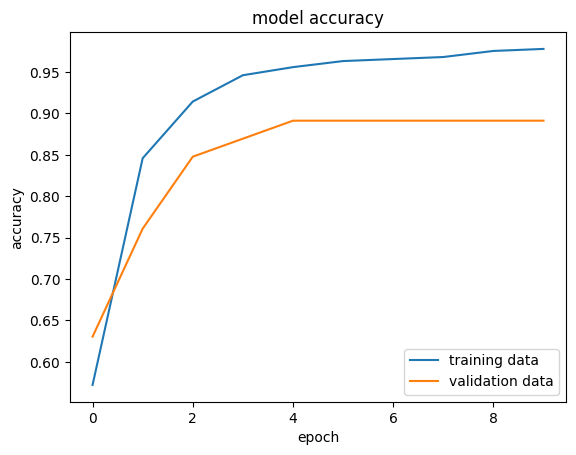

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [ ]:
# Build ANN Model with two hidden layers
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the Neural Network with two hidden layers
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Neural Network
history1 = model2.fit(X_train_ann, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7206 - loss: 0.6256 - val_accuracy: 0.8478 - val_loss: 0.4695
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8440 - loss: 0.4416 - val_accuracy: 0.8913 - val_loss: 0.3464
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.3333 - val_accuracy: 0.9130 - val_loss: 0.2792
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9070 - loss: 0.2689 - val_accuracy: 0.9130 - val_loss: 0.2375
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9354 - loss: 0.2261 - val_accuracy: 0.9348 - val_loss: 0.2081
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9443 - loss: 0.1942 - val_accuracy: 0.9348 - val_loss: 0.1850
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9640 - loss: 0.1682 - val_accuracy: 0.9565 - val_loss: 0.1671
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9735 - loss: 0.1460 - val_accuracy: 0.9565 - val_loss

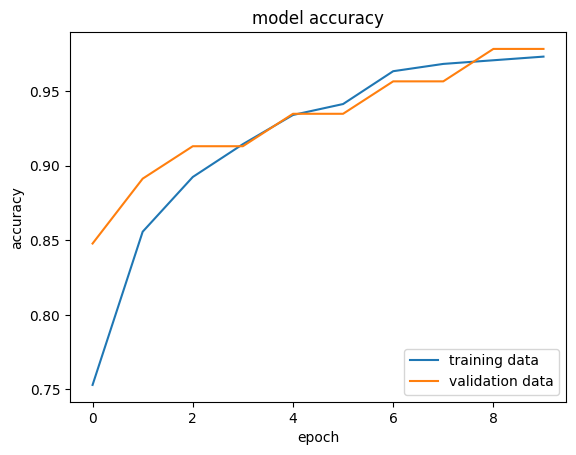

In [ ]:
  import matplotlib.pyplot as plt

  plt.plot(history1.history['accuracy'])
  plt.plot(history1.history['val_accuracy'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')

  plt.legend(['training data', 'validation data'], loc = 'lower right')

In [ ]:
test_loss1, test_accuracy1 = model1.evaluate(X_test_ann, Y_test)
print(f"Model1 Test Accuracy: {test_accuracy1}")

test_loss2, test_accuracy2 = model2.evaluate(X_test_ann, Y_test)
print(f"Model2 Test Accuracy: {test_accuracy2}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1399 
Model1 Test Accuracy: 0.9649122953414917
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.1140 
Model2 Test Accuracy: 0.9649122953414917


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

# Initialize Logistic Regression model
log_reg1 = LogisticRegression(max_iter=1000, random_state=42)

# Recursive Feature Elimination (RFE)
rfe = RFE(log_reg1, n_features_to_select=8)  # Select top 8 features (you can adjust this number)
rfe.fit(X_train_scaled1, Y_train)

# Transform the data to keep only the selected features
X_train_selected = X_train.iloc[:, rfe.support_]
X_test_selected = X_test.iloc[:, rfe.support_]

# Display selected feature names
selected_feature_names = X.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_feature_names)

# Train Logistic Regression on the selected features
log_reg1.fit(X_train_selected, Y_train)

# Evaluate the Logistic Regression model
y_pred_lr = log_reg1.predict(X_test_selected)
print("Logistic Regression Accuracy on RFE-selected features:", accuracy_score(Y_test, y_pred_lr))
print(classification_report(Y_test, y_pred_lr))


Selected Features by RFE:
 Index(['mean concave points', 'radius error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')
Logistic Regression Accuracy on RFE-selected features: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_selected)
X_test_scaled2 = scaler.transform(X_test_selected)

In [ ]:
# Build ANN model
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scaled2.shape[1],)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model3.fit(X_train_scaled2, Y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7095 - loss: 0.6294 - val_accuracy: 0.7826 - val_loss: 0.5373
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7480 - loss: 0.5600 - val_accuracy: 0.8696 - val_loss: 0.4659
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8855 - loss: 0.4891 - val_accuracy: 0.9348 - val_loss: 0.3992
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - loss: 0.4203 - val_accuracy: 0.9565 - val_loss: 0.3402
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9476 - loss: 0.3582 - val_accuracy: 0.9783 - val_loss: 0.2888
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9545 - loss: 0.3041 - val_accuracy: 1.0000 - val_loss: 0.2463
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.2588 - val_accuracy: 1.0000 - val_loss: 0.2119
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9640 - loss: 0.2222 - val_accuracy: 0.9783 - val_loss: 0.1843
Ep

In [ ]:
# Evaluate on the test set
loss, accuracy = model3.evaluate(X_test_scaled2, Y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred_ann = (model3.predict(X_test_scaled2) > 0.5).astype(int)
print("Classification Report:\n", classification_report(Y_test, y_pred_ann.flatten()))

Test Accuracy: 0.9737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


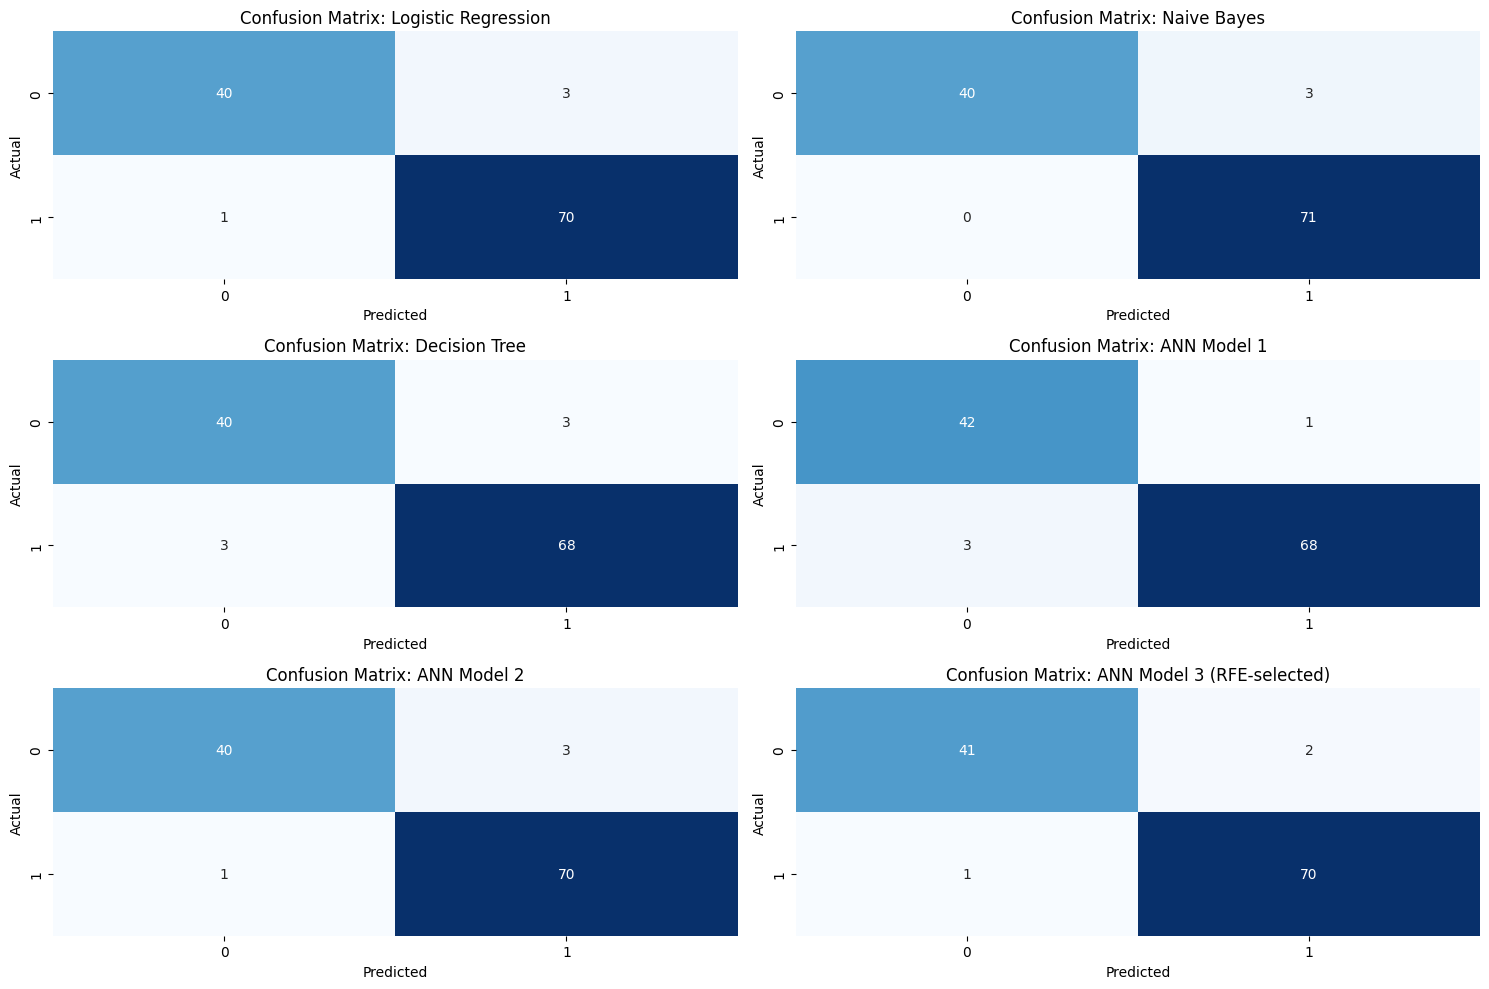

<ipython-input-51-f87bed2deaff>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=accuracies, palette="viridis")


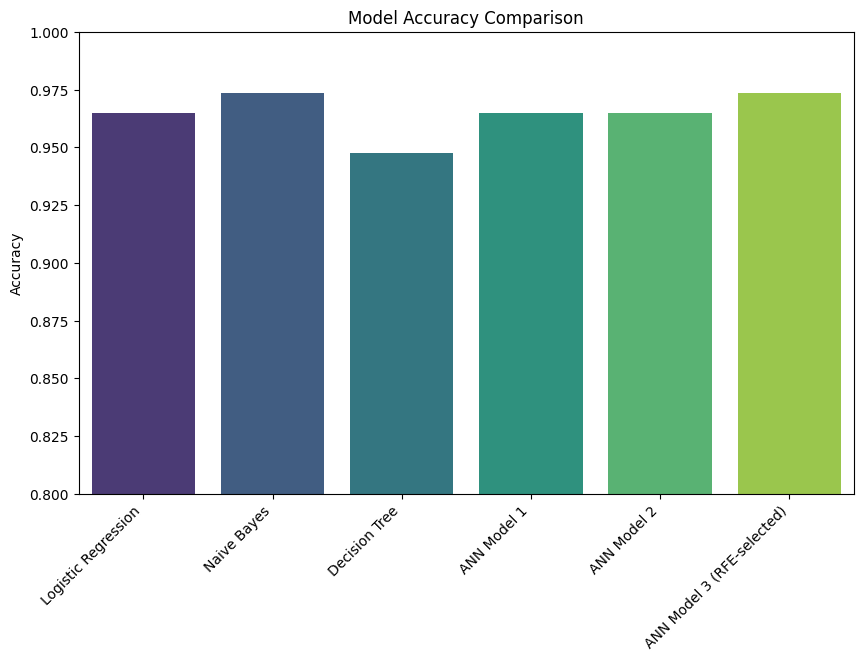

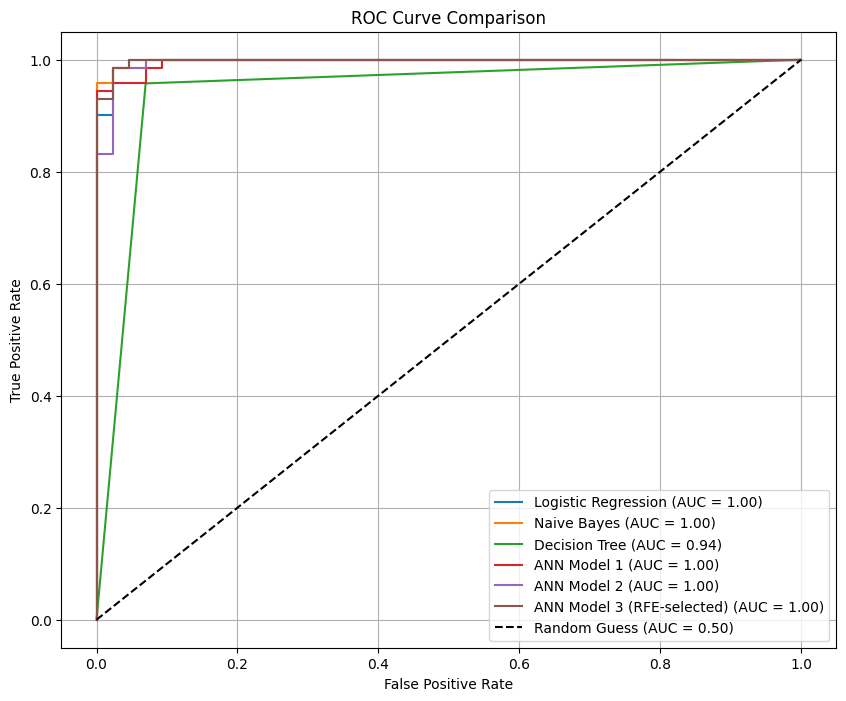

                        Model  Precision    Recall  F1-Score
0         Logistic Regression   0.958904  0.985915  0.972222
1                 Naive Bayes   0.959459  1.000000  0.979310
2               Decision Tree   0.957746  0.957746  0.957746
3                 ANN Model 1   0.985507  0.957746  0.971429
4                 ANN Model 2   0.958904  0.985915  0.972222
5  ANN Model 3 (RFE-selected)   0.972222  0.985915  0.979021


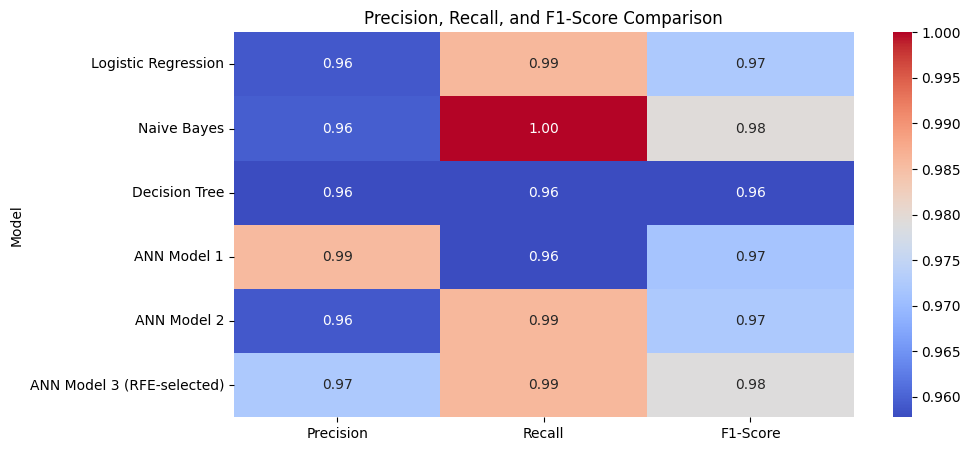

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their predictions
models = {
    "Logistic Regression": (y_pred_lr, log_reg.predict_proba(X_test_scaled)[:, 1]),
    "Naive Bayes": (y_pred_nb, naive_bayes.predict_proba(X_test)[:, 1]),
    "Decision Tree": (y_pred_dt, decision_tree.predict_proba(X_test)[:, 1]),
    "ANN Model 1": (model1.predict(X_test_ann) > 0.5, model1.predict(X_test_ann).flatten()),
    "ANN Model 2": (model2.predict(X_test_ann) > 0.5, model2.predict(X_test_ann).flatten()),
    "ANN Model 3 (RFE-selected)": (y_pred_ann.flatten(), model3.predict(X_test_scaled2).flatten()),
}

# Confusion Matrices
plt.figure(figsize=(15, 10))
for i, (model_name, (y_pred, _)) in enumerate(models.items()):
    cm = confusion_matrix(Y_test, y_pred.astype(int))
    plt.subplot(3, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Accuracy Bar Plot
accuracies = [accuracy_score(Y_test, y_pred.astype(int)) for y_pred, _ in models.values()]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.8, 1)
plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))
for model_name, (_, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Precision, Recall, and F1-Score Table
from sklearn.metrics import precision_recall_fscore_support

metrics = []
for model_name, (y_pred, _) in models.items():
    precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred.astype(int), average="binary")
    metrics.append({"Model": model_name, "Precision": precision, "Recall": recall, "F1-Score": f1})

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Heatmap for Precision, Recall, and F1-Score
plt.figure(figsize=(10, 5))
sns.heatmap(metrics_df.set_index("Model"), annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Precision, Recall, and F1-Score Comparison")
plt.show()
